In [1]:
import pandas as pd

### Load the Extracted Data 

In [2]:
df = pd.read_excel('GENAI-BCG.xlsx')

In [3]:
df

,Year,Company,Total Revenue,Net Income,Total Assets,Total Liabilities,Cash Flow From Operating Activities
0,2024,Microsoft,245122,88136,512163,243686,118548
1,2023,Microsoft,211915,72361,411976,205753,87582
2,2022,Microsoft,198270,72738,364840,198298,89035
3,2024,Tesla,97690,7153,122070,48390,14923
4,2023,Tesla,96773,14974,106618,43009,13256
5,2022,Tesla,81462,12556,82338,36440,14724
6,2024,Apple,391035,93736,364980,308030,118254
7,2023,Apple,383285,96995,352583,290437,110543
8,2022,Apple,394328,99803,353755,287912,122151


### Growth Percentage Calculations

In [4]:
df['Revenue Growth (%)'] = df.groupby(by=['Company'])['Total Revenue'].pct_change()*100
df['Net Income Growth (%)'] = df.groupby(['Company'])['Net Income'].pct_change() * 100
df['Assets Growth (%)'] = df.groupby('Company')["Total Assets"].pct_change() * 100
df['Liabilities Growth (%)'] = df.groupby('Company')["Total Liabilities"].pct_change() * 100
df['CFO Growth (%)'] = df.groupby('Company')["Cash Flow From Operating Activities"].pct_change() * 100
df

,Year,Company,Total Revenue,Net Income,Total Assets,Total Liabilities,Cash Flow From Operating Activities,Revenue Growth (%),Net Income Growth (%),Assets Growth (%),Liabilities Growth (%),CFO Growth (%)
0,2024,Microsoft,245122,88136,512163,243686,118548,NaN,NaN,NaN,NaN,NaN
1,2023,Microsoft,211915,72361,411976,205753,87582,-13.547132,-17.898475,-19.561546,-15.566344,-26.121065
2,2022,Microsoft,198270,72738,364840,198298,89035,-6.438902,0.520999,-11.441443,-3.623276,1.659017
3,2024,Tesla,97690,7153,122070,48390,14923,NaN,NaN,NaN,NaN,NaN
4,2023,Tesla,96773,14974,106618,43009,13256,-0.938684,109.338739,-12.658311,-11.120066,-11.170676
5,2022,Tesla,81462,12556,82338,36440,14724,-15.821562,-16.147990,-22.772890,-15.273547,11.074231
6,2024,Apple,391035,93736,364980,308030,118254,NaN,NaN,NaN,NaN,NaN
7,2023,Apple,383285,96995,352583,290437,110543,-1.981920,3.476786,-3.396624,-5.711457,-6.520710
8,2022,Apple,394328,99803,353755,287912,122151,2.881146,2.894995,0.332404,-0.869380,10.500891


In [5]:
# Fill NA values that result from pct_change calculations with 0 or an appropriate value
df.fillna(0, inplace=True)

In [6]:
# Net Income Margin = Net Income / Revenue
df["Net Income Margin (%)"] = (df["Net Income"] / df["Total Revenue"]) * 100

# Cash Flow Margin = CFO / Revenue
df["CFO Margin (%)"] = (df["Cash Flow From Operating Activities"] / df["Total Revenue"]) * 100

# Return on Assets (ROA)
df["ROA (%)"] = (df["Net Income"] / df["Total Assets"]) * 100

In [7]:
# Debt-to-Assets ratio
df["Debt to Assets (%)"] = (df["Total Liabilities"] / df["Total Assets"]) * 100

# Debt-to-Equity ratio
df["Equity"] = df["Total Assets"] - df["Total Liabilities"]
df["Debt to Equity"] = df["Total Liabilities"] / df["Equity"]


In [8]:
df

,Year,Company,Total Revenue,Net Income,Total Assets,Total Liabilities,Cash Flow From Operating Activities,Revenue Growth (%),Net Income Growth (%),Assets Growth (%),Liabilities Growth (%),CFO Growth (%),Net Income Margin (%),CFO Margin (%),ROA (%),Debt to Assets (%),Equity,Debt to Equity
0,2024,Microsoft,245122,88136,512163,243686,118548,0.000000,0.000000,0.000000,0.000000,0.000000,35.955973,48.362856,17.208584,47.579774,268477,0.907661
1,2023,Microsoft,211915,72361,411976,205753,87582,-13.547132,-17.898475,-19.561546,-15.566344,-26.121065,34.146238,41.328835,17.564373,49.942958,206223,0.997721
2,2022,Microsoft,198270,72738,364840,198298,89035,-6.438902,0.520999,-11.441443,-3.623276,1.659017,36.686337,44.905936,19.936959,54.352045,166542,1.190679
3,2024,Tesla,97690,7153,122070,48390,14923,0.000000,0.000000,0.000000,0.000000,0.000000,7.322141,15.275873,5.859753,39.641189,73680,0.656759
4,2023,Tesla,96773,14974,106618,43009,13256,-0.938684,109.338739,-12.658311,-11.120066,-11.170676,15.473324,13.698036,14.044533,40.339342,63609,0.676146
5,2022,Tesla,81462,12556,82338,36440,14724,-15.821562,-16.147990,-22.772890,-15.273547,11.074231,15.413322,18.074685,15.249338,44.256601,45898,0.793934
6,2024,Apple,391035,93736,364980,308030,118254,0.000000,0.000000,0.000000,0.000000,0.000000,23.971256,30.241283,25.682503,84.396405,56950,5.408780
7,2023,Apple,383285,96995,352583,290437,110543,-1.981920,3.476786,-3.396624,-5.711457,-6.520710,25.306234,28.840941,27.509835,82.374079,62146,4.673462
8,2022,Apple,394328,99803,353755,287912,122151,2.881146,2.894995,0.332404,-0.869380,10.500891,25.309641,30.977004,28.212463,81.387401,65843,4.372705


### Aggregates & Comparisons

In [9]:
# Average profitability per company across 3 years
avg_profitability = df.groupby("Company")[["Net Income Margin (%)", "ROA (%)"]].mean()

# Highest revenue growth company-year
max_revenue_growth = df.loc[df["Revenue Growth (%)"].idxmax(), ["Company", "Year", "Revenue Growth (%)"]]

# Compare average CFO margins
avg_cfo_margin = df.groupby("Company")["CFO Margin (%)"].mean()


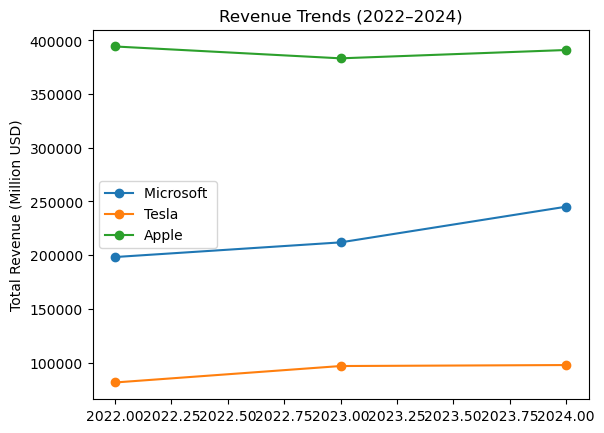

In [10]:
import matplotlib.pyplot as plt

# Revenue trends
for company in df["Company"].unique():
    temp = df[df["Company"] == company].sort_values("Year")
    plt.plot(temp["Year"], temp["Total Revenue"], marker="o", label=company)

plt.title("Revenue Trends (2022–2024)")
plt.ylabel("Total Revenue (Million USD)")
plt.legend()
plt.show()



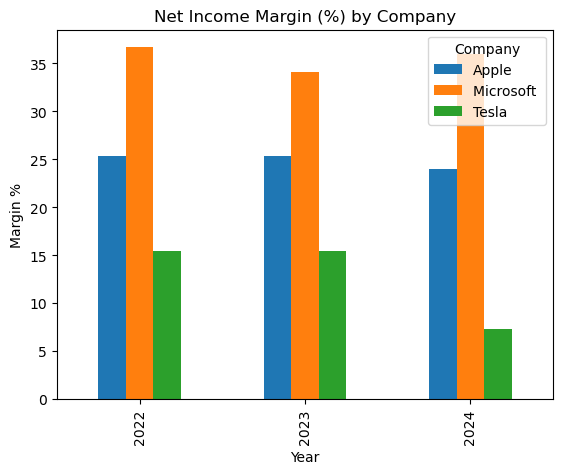

In [11]:
# Profit margin comparison
df.pivot(index="Year", columns="Company", values="Net Income Margin (%)").plot(kind="bar")
plt.title("Net Income Margin (%) by Company")
plt.ylabel("Margin %")
plt.show()

In [12]:
# Save to CSV
df.to_csv("financials_analysis.csv", index=False)

print("Data saved successfully!")

Data saved successfully!
